<font size ="6" > 1. Exploratory Data Analysis (EDA) </font>


####Days_left is a categorical!!!!


<font size ="5" > Import Data and Packages </font>
<li> Removing index column</li>

In [38]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\limra\\IS460\\data\\Clean_Dataset.csv")
df = df.drop('Unnamed: 0', axis=1)

<font size ="5" > Summary Statistics </font>


In [39]:
df.describe(include = "all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [40]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [41]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9], include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750000,7.000000,3389.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000


<font size ="6" > 2. Data visualization </font>
<li>Checking whethere there are any outliers</li>
<li>Getting the distribution of numerical data </li>
<li> Checking if there is a relationship between variables </li>

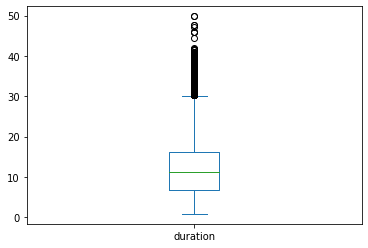

In [42]:
df[['duration']].plot(kind='box')
plt.show()

<AxesSubplot:>

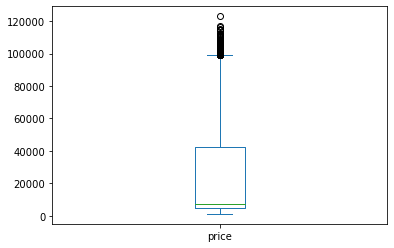

In [43]:
df[['price']].plot(kind='box')

<font size = "3">From the boxplots, there is evidence that there are outliers for the durtaion as well as the price variable. To get a better visualisation of the distribution, we plot histograms. </font>

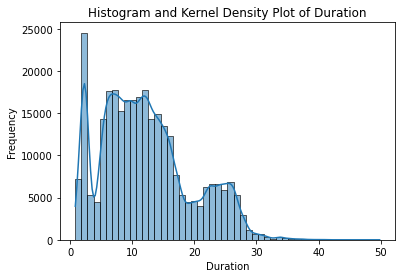

In [44]:
sns.histplot(df['duration'], bins= 50, kde=True)
plt.title('Histogram and Kernel Density Plot of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

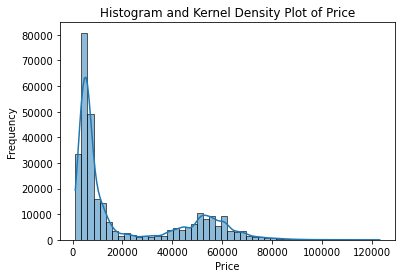

In [45]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram and Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<font size = "3">From the histograms, the distribution of duration  is skewed to the right. The distribution of price is also skewed to the right. </font>

<font size = "3"> Next, scatter plots can be used to visualise any relationship between the numerical variables<font>

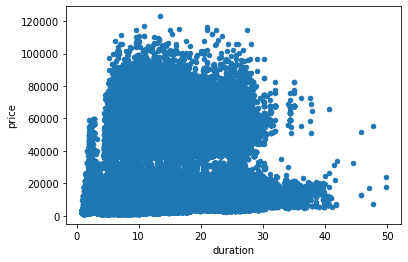

In [46]:
df[['duration', 'price']].plot(kind='scatter', x='duration', y='price')
plt.show()

There seems to be positive linear relationship between the price and duration

<font size = "6"> 3. Data Processing </font>
<font size = "3"><li>Removing all outliers from duration and price variable using IQR https://medium.com/@pp1222001/outlier-detection-and-removal-using-the-iqr-method-6fab2954315d#:~:text=To%20calculate%20the%20IQR%2C%20you,the%2025th%20percentile%20(Q1).&text=To%20identify%20outliers%20using%20the,Bound%3A%20Q3%20%2B%201.5%20*%20IQRn</li>
<li>Transforming the duration variable using log transformation </li>
</font>

In [10]:
# ## removing outliers 
# def three_sd_range(series):
#     mean = series.mean()
#     sd = series.std()
#     low = mean - 3*sd
#     high = mean + 3*sd

#     return (low, high)

# for col_name in ['duration', 'price']:
#     lower, upper = three_sd_range(df[col_name])
#     has_outlier = (df[col_name].min() < lower) or (df[col_name].max() > upper)
#     print(col_name + ' has outliers: ' + str(has_outlier))

#     if has_outlier:
#         # Remove outliers
#         curr_length = df[col_name].count()
#         df = df[ (df[col_name]>=lower) & (df[col_name]<=upper)]
#         new_length = df[col_name].count()
#         row_removed = curr_length - new_length
#         print(str(row_removed) + ' row will be removed from ')

#     print()



duration has outliers: True
722 row will be removed from 

price has outliers: True
595 row will be removed from 



In [47]:
print("Old Shape: ", df.shape)

Old Shape:  (300153, 11)


In [48]:
''' Outliers of Duration '''
# IQR
# Calculate the upper and lower limits

def remove_outliers(df,col_list):
    for col in col_list:
        Q1= df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        #Create arrays of Boolean values indicating the outlier rows
        upper_array = np.where(df[col] >= upper)[0]
        lower_array = np.where(df[col] <= lower)[0]

        # Removing the outliers
        df.drop(index=upper_array, inplace=True)
        df.drop(index=lower_array, inplace=True)

        # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    return df 

In [49]:
cols = ['duration','price']
remove_outliers(df,cols)

New Shape:  (297921, 11)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


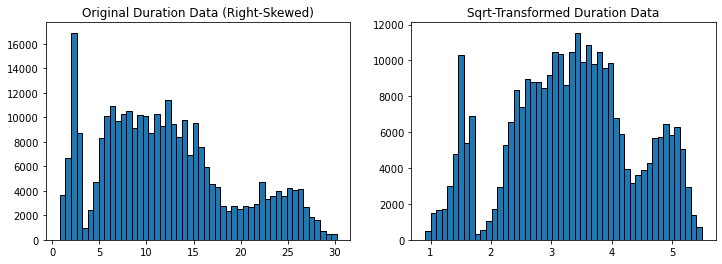

In [52]:
import numpy as np
import matplotlib.pyplot as plt
sqrt_transformed_data = np.sqrt(df['duration'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.title('Original Duration Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(sqrt_transformed_data, bins=50, edgecolor='black')
plt.title('Sqrt-Transformed Duration Data')
plt.show()
df['duration_sqrt'] = np.sqrt(df['duration'])

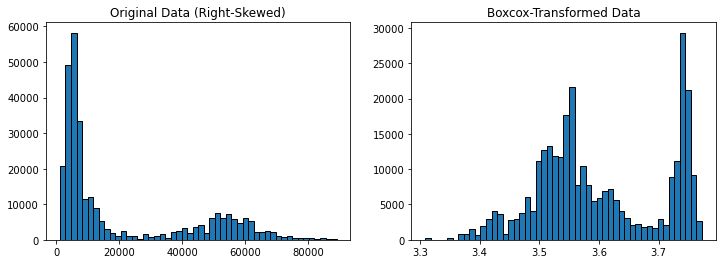

In [13]:
# from scipy.stats import boxcox
# boxcox_transformed_data, _ = boxcox(df['price'])
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.hist(df['price'], bins=50, edgecolor='black')
# plt.title('Original Data (Right-Skewed)')

# plt.subplot(1, 2, 2)
# plt.hist(boxcox_transformed_data, bins=50, edgecolor='black')
# plt.title('Boxcox-Transformed Data')
# plt.show()
# df['price_boxcox'] = boxcox_transformed_data


In [53]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_sqrt
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1.473092
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1.526434
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1.473092
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,1.500000
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,1.526434


In [14]:
# from sklearn.preprocessing import StandardScaler
# variables = ['duration_sqrt', 'price_boxcox']
# x = df[variables]
# x = StandardScaler().fit_transform(x)
# x = pd.DataFrame(x, columns=[f'{col}_scaled' for col in variables])
# df  = pd.concat([df, x], axis=1)
# df = df.drop('duration_sqrt', axis = 1)
# df = df.drop('price_boxcox', axis = 1)
# df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,-1.685797,-0.497646


In [55]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [56]:
# grouping days_left into week 
bins = [0,7,14,21,28,35,42,50]
df['days_left_binned'] = pd.cut(df['days_left'], bins=bins, labels=False, right=False)

In [60]:
column_to_move = 'days_left_binned'
moved_column = df.pop(column_to_move)
df.insert(10, column_to_move, moved_column)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,days_left_binned,price,duration_sqrt
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,0,5953,1.473092
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,0,5953,1.526434
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,0,5956,1.473092
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,0,5955,1.500000
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,0,5955,1.526434


In [61]:
# column_to_move = 'days_left_binned'
# moved_column = df.pop(column_to_move)
# df.insert(10, column_to_move, moved_column)
df = df.drop("duration", axis=1)
df = df.drop("days_left", axis=1)
# df = df.drop("price", axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,price,duration_sqrt
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,5953,1.473092
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,5953,1.526434
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,5956,1.473092
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,5955,1.500000
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,5955,1.526434


In [62]:
#storing the data frame so that it can be used across all notebooks
%store df

Stored 'df' (DataFrame)


In [63]:
df.to_csv("C:\\Users\\limra\\IS460\\data\\df.csv")